In [128]:
from sqlalchemy import create_engine
import pandas as pd
from sqlalchemy import inspect
from datetime import datetime as dt
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport


In [129]:
engine = create_engine("sqlite:///sqlite/MTA_1.db")
all_tables = inspect(engine)
print(all_tables.get_table_names())

['mta']


In [130]:
#data = generate_dates()
#data.to_sql("mta", engine, if_exists="append")

In [131]:
engine.execute("DELETE from mta where ENTRIES='ENTRIES'")

In [137]:
mta_data = pd.read_sql('SELECT * FROM mta;', engine)
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


In [133]:
#chech for nulls 
pd.isnull(mta_data).sum()
mta_data
#check number of stations we have in my dataframe
df = mta_data.groupby('STATION').size()
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISON', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [138]:
#combine 2 columns (data & Time)
mta_data["DATETIME"] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME, errors='coerce')
#week days
mta_data['WEEK_DAYS'] = pd.to_datetime(mta_data['DATE']).dt.day_name()
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEK_DAYS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,05:00:00,REGULAR,5554,614,2021-08-27 05:00:00,Friday
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,09:00:00,REGULAR,5554,614,2021-08-27 09:00:00,Friday
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,13:00:00,REGULAR,5554,614,2021-08-27 13:00:00,Friday
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,17:00:00,REGULAR,5554,614,2021-08-27 17:00:00,Friday


In [139]:
mta_data['DELTA'] = (mta_data['ENTRIES'] - mta_data['ENTRIES'].shift(-1)).abs() + (mta_data['EXITS'] - mta_data['EXITS'].shift(-1)).abs()
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEK_DAYS,DELTA
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00,Saturday,8.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00,Saturday,22.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00,Saturday,86.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00,Saturday,140.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00,Saturday,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,05:00:00,REGULAR,5554,614,2021-08-27 05:00:00,Friday,0.0
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,09:00:00,REGULAR,5554,614,2021-08-27 09:00:00,Friday,0.0
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,13:00:00,REGULAR,5554,614,2021-08-27 13:00:00,Friday,0.0
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,17:00:00,REGULAR,5554,614,2021-08-27 17:00:00,Friday,0.0


In [271]:
#check for poten
mta_data.sort_values('DELTA', ascending=False).head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEK_DAYS,DELTA
190655,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,06/04/2021,21:00:00,REGULAR,130576,394400,2021-06-04 21:00:00,Friday,3.966153e+09
400094,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,06/11/2021,21:00:00,REGULAR,133984,404907,2021-06-11 21:00:00,Friday,3.966127e+09
609321,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,06/18/2021,21:00:00,REGULAR,137324,415282,2021-06-18 21:00:00,Friday,3.966097e+09
818854,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,06/25/2021,21:00:00,REGULAR,140502,425572,2021-06-25 21:00:00,Friday,3.966069e+09
1028506,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/02/2021,21:00:00,REGULAR,143804,435553,2021-07-02 21:00:00,Friday,3.966040e+09
1238149,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/09/2021,21:00:00,REGULAR,146921,445308,2021-07-09 21:00:00,Friday,3.966013e+09
1447557,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/16/2021,21:00:00,REGULAR,150100,455612,2021-07-16 21:00:00,Friday,3.965986e+09
1656861,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/23/2021,21:00:00,REGULAR,153563,465778,2021-07-23 21:00:00,Friday,3.965957e+09
1866343,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/30/2021,21:00:00,REGULAR,156868,476770,2021-07-30 21:00:00,Friday,3.965928e+09
2075858,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,08/06/2021,21:00:00,REGULAR,160166,487550,2021-08-06 21:00:00,Friday,3.965898e+09


In [272]:
mta_data.DELTA.describe()

count    2.722609e+06
mean     3.211902e+06
std      8.305551e+07
min      0.000000e+00
25%      1.500000e+01
50%      7.800000e+01
75%      2.010000e+02
max      3.966153e+09
Name: DELTA, dtype: float64

In [273]:
# group by single turnstile 

tun_id = mta_data.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DELTA'].sum().sort_values(ascending=False)
tun_id

C/A   UNIT  SCP       STATION       
R523  R147  00-00-03  61 ST WOODSIDE    5.155796e+10
N501  R020  01-03-02  47-50 STS ROCK    5.148511e+10
R523  R147  00-00-04  61 ST WOODSIDE    5.123880e+10
N501  R020  01-03-01  47-50 STS ROCK    5.106799e+10
R116  R030  00-00-01  CHAMBERS ST       4.977825e+10
                                            ...     
R534  R055  01-05-00  FLUSHING-MAIN     1.157000e+03
N307  R359  00-05-00  COURT SQ-23 ST    1.040000e+03
D015  R396  00-05-00  AVENUE U          9.800000e+02
N541  R241  01-05-00  15 ST-PROSPECT    8.320000e+02
B020  R263  00-02-02  AVENUE H          3.760000e+02
Name: DELTA, Length: 5019, dtype: float64

In [274]:

groups = tun_id.groupby(['STATION']).sum().sort_values(ascending=False)

top_10_daily_ave = groups.head(10) / 126

top_10_daily_ave.reset_index()

,STATION,DELTA
0,125 ST,2.183631e+09
1,42 ST-PORT AUTH,1.989646e+09
2,34 ST-PENN STA,1.943147e+09
3,161/YANKEE STAD,1.765759e+09
4,34 ST-HERALD SQ,1.471082e+09
5,CANAL ST,1.458729e+09
6,FULTON ST,1.433477e+09
7,23 ST,1.379536e+09
8,167 ST,1.333368e+09
9,18 AV,1.324853e+09


In [275]:
#top 10 busiest stations
top_10_stations = tun_id.head(10)
top_10_stations

#taking the average of interval (from 29/5/2021 to 27/8/2021) 90 days:b

top_10_stations_ave = top_10_stations/90
top_10_stations_ave.sort_values()

C/A   UNIT  SCP       STATION        
N100  R252  00-00-01  HIGH ST            5.338093e+08
N062  R011  01-00-01  42 ST-PORT AUTH    5.362949e+08
N534  R220  01-00-02  CARROLL ST         5.378276e+08
C004  R089  01-06-01  JAY ST-METROTEC    5.437724e+08
R116  R030  00-00-02  CHAMBERS ST        5.529474e+08
            00-00-01  CHAMBERS ST        5.530917e+08
N501  R020  01-03-01  47-50 STS ROCK     5.674221e+08
R523  R147  00-00-04  61 ST WOODSIDE     5.693200e+08
N501  R020  01-03-02  47-50 STS ROCK     5.720568e+08
R523  R147  00-00-03  61 ST WOODSIDE     5.728662e+08
Name: DELTA, dtype: float64

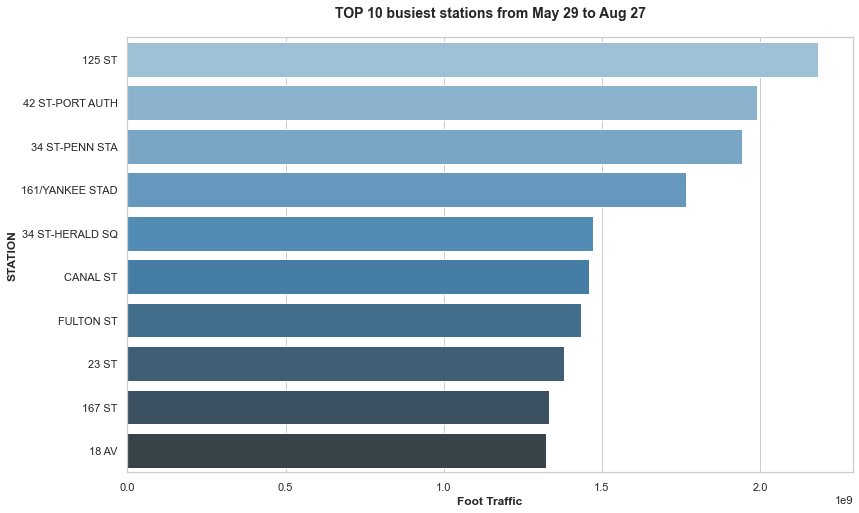

In [276]:
#the top 10 busiest stations over the interval

sns.set(style="whitegrid")

plt.figure(figsize=(13,8))

sns.barplot( x=top_10_daily_ave, y=top_10_daily_ave.index, palette="Blues_d", orient="h")

plt.title('TOP 10 busiest stations from May 29 to Aug 27', weight = 'bold', pad='20', size=14)
plt.xlabel('Foot Traffic', weight='bold')
plt.ylabel('STATION', weight='bold');


In [268]:
top_stations_list = ['125 ST','42 ST-PORT AUTH', '34 ST-PENN STA', '161/YANKEE STAD', '34 ST-HERALD SQ']


turns_daily = mta_data.groupby(['STATION', 'WEEK_DAYS'])['DELTA'].sum()

TOP_busiest_stations = turns_daily.loc[top_stations_list]
TOP_busiest_stations

(35,)

In [260]:
#profile = ProfileReport(, title="MTA Profiling Report")
